In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [4]:
dataset= pd.read_csv('Employee_Attrition.csv')
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
dataset.shape

(14999, 10)

In [6]:
dataset.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [7]:
#Check duplicates
dataset[dataset.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
#Remove duplicates
dataset = dataset.drop_duplicates()
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [9]:
# check again duplicate value
dataset[dataset.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


In [10]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


# EDA and Data Visualization

In [12]:
dataset['left'].value_counts()

,count
left,
0,10000
1,1991


<Axes: xlabel='left'>

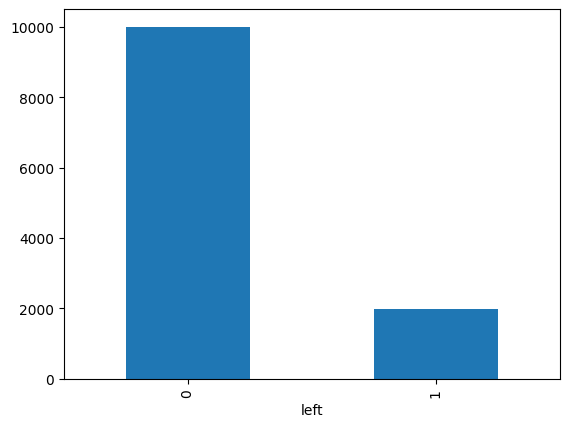

In [13]:
(dataset['left'].value_counts()).plot(kind='bar')
#plt.show()

## Impact of Salary on person retention

<Axes: xlabel='salary'>

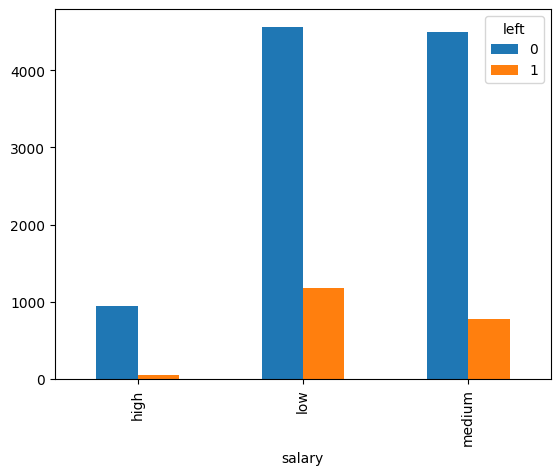

In [14]:
pd.crosstab(dataset['salary'],dataset['left']).plot(kind='bar')

## Department Wise Retention

<Axes: xlabel='Department'>

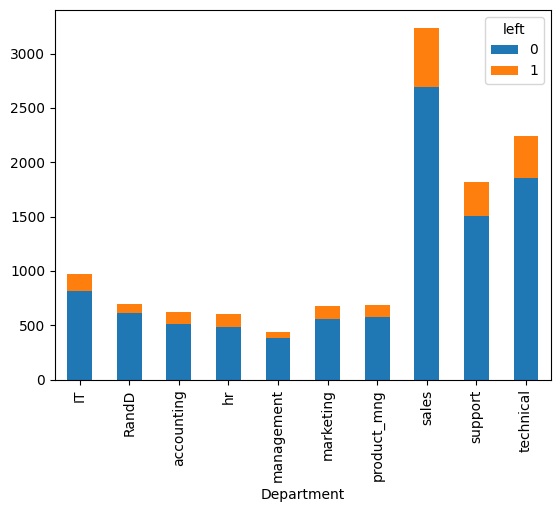

In [15]:
pd.crosstab(dataset['Department'],dataset['left']).plot(kind='bar',stacked=True)

In [16]:
pd.crosstab(dataset['Department'],dataset['left'])

left,0,1
Department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


<Axes: xlabel='Department'>

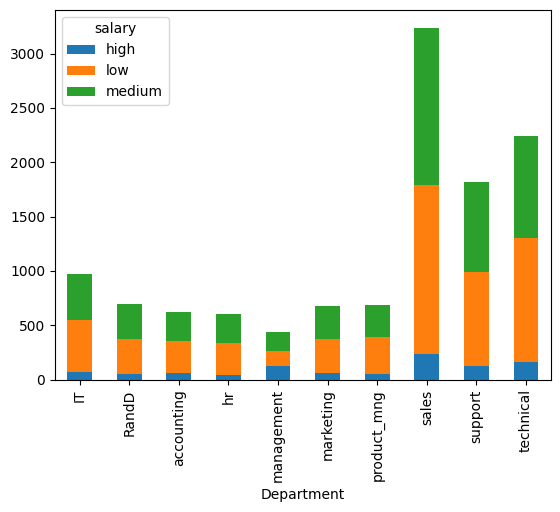

In [17]:
pd.crosstab(dataset['Department'],dataset['salary']).plot(kind='bar',stacked=True)

## Finding Numerical Features

In [18]:
num_fea = [i for i in dataset.columns if dataset.dtypes[i]=='int64']
num_fea2 = [i for i in dataset.columns if dataset.dtypes[i]=='float64']
num_fea , num_fea2

(['number_project',
  'average_montly_hours',
  'time_spend_company',
  'Work_accident',
  'left',
  'promotion_last_5years'],
 ['satisfaction_level', 'last_evaluation'])

<Figure size 1000x1000 with 0 Axes>

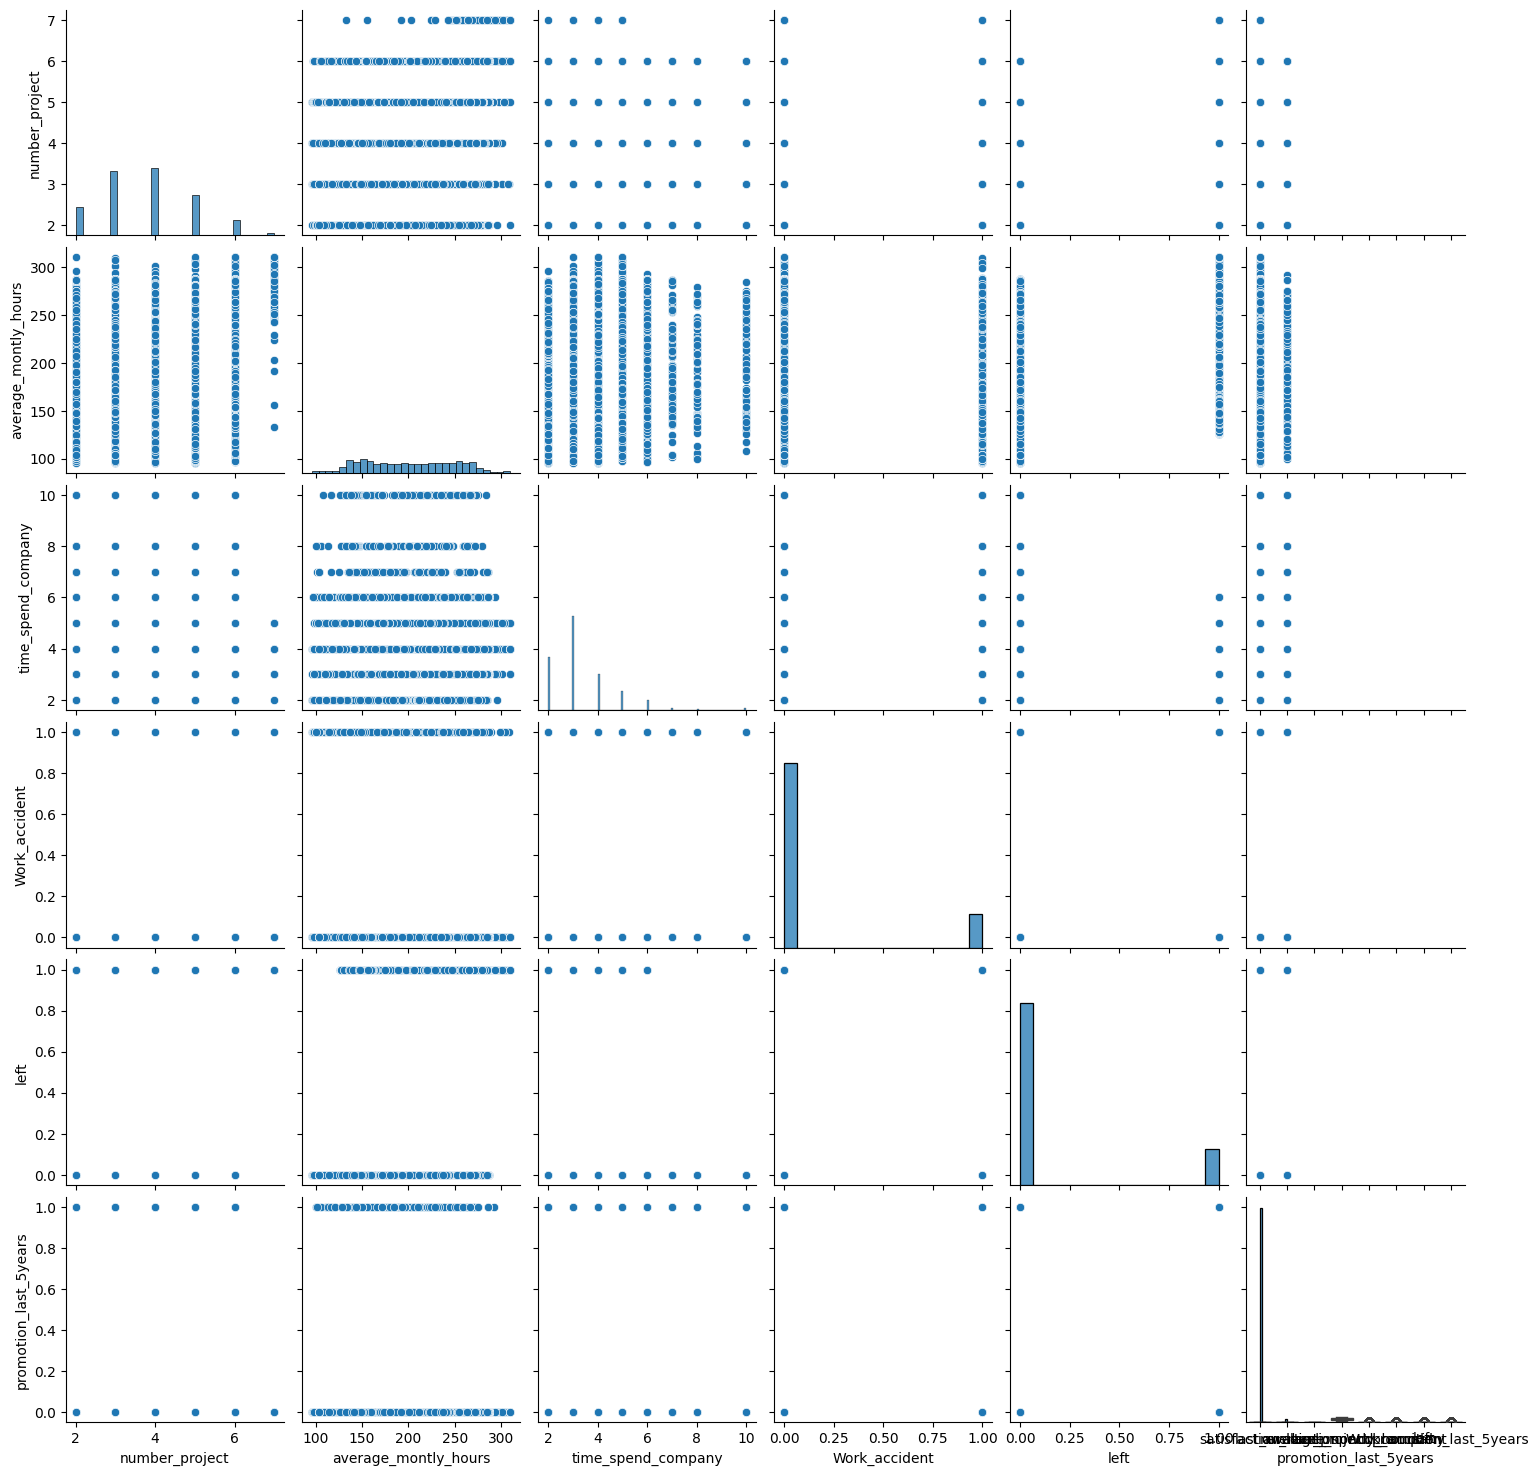

In [19]:
plt.figure(figsize=(10,10))
#sns.heatmap(dataset[num_fea].corr(),annot=True)
sns.pairplot(dataset[num_fea])
sns.boxplot(data=dataset)
plt.show()

# Feature Engineering

In [20]:
dataset['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [21]:
dataset['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
dataset['Department']=le.fit_transform(dataset['Department'])
dataset['salary']=le.fit_transform(dataset['salary'])

In [24]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


# Train Test Split

In [25]:
input = dataset.drop('left',axis=1)
output=dataset["left"]
output

,left
0,1
1,1
2,1
3,1
4,1
...,...
11995,0
11996,0
11997,0
11998,0


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2,random_state=0)

# Standard Scalling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [28]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [29]:
x_train_scaled
x_test_scaled

array([[ 1.44990816, -0.58217142, -1.55606183, ..., -0.12982958,
         0.73415699, -0.56784683],
       [-0.53654329,  0.72354388, -0.69682833, ..., -0.12982958,
        -1.33631897, -0.56784683],
       [-0.6193121 , -1.35373046, -0.69682833, ..., -0.12982958,
        -0.99123965, -0.56784683],
       ...,
       [ 1.03606411, -1.29437976,  0.16240516, ..., -0.12982958,
         0.38907766, -0.56784683],
       [-0.28823686,  0.42679041,  0.16240516, ..., -0.12982958,
         0.73415699,  1.01782618],
       [ 0.33252922,  1.37640153,  0.16240516, ..., -0.12982958,
        -0.99123965, -0.56784683]])

# Model Development

In [30]:
from sklearn.ensemble import RandomForestClassifier


In [31]:
rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)

RandomForestClassifier()

# Predict Model

In [71]:
pred = rf.predict(x_test_scaled)

In [72]:
pred

array([0, 0, 0, ..., 0, 0, 0])

# Model Evaluation

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score

In [35]:
cm = confusion_matrix(y_test,pred)
print(cm)

[[2019    5]
 [  26  349]]


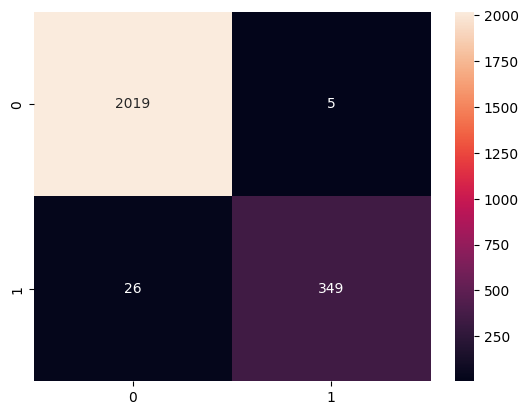

In [36]:
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

# Accuracy

In [37]:
model_acc = accuracy_score(y_test,pred)*100
model_acc

98.70779491454773

# Precision

In [38]:
model_pre = precision_score(y_test,pred)*100
model_pre

98.58757062146893

#Recall

In [39]:
mode_recall = recall_score(y_test,pred)*100
mode_recall

93.06666666666666

# F1-Score

In [40]:
from sklearn.metrics import f1_score
f1_score(y_test,pred)
print(f1_score)

<function f1_score at 0x7ea75b43b130>


# Classification Report

In [41]:
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2024
           1       0.99      0.93      0.96       375

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399



# Feature Extraction

In [42]:
score_list = rf.feature_importances_
list_features = list(input.columns)
score_df = pd.DataFrame({'Features':list_features,'Score':score_list})
score_df.sort_values('Score',ascending=False)

,Features,Score
0,satisfaction_level,0.345333
2,number_project,0.188575
4,time_spend_company,0.169162
3,average_montly_hours,0.150273
1,last_evaluation,0.120972
7,Department,0.013058
8,salary,0.007063
5,Work_accident,0.004852
6,promotion_last_5years,0.000711


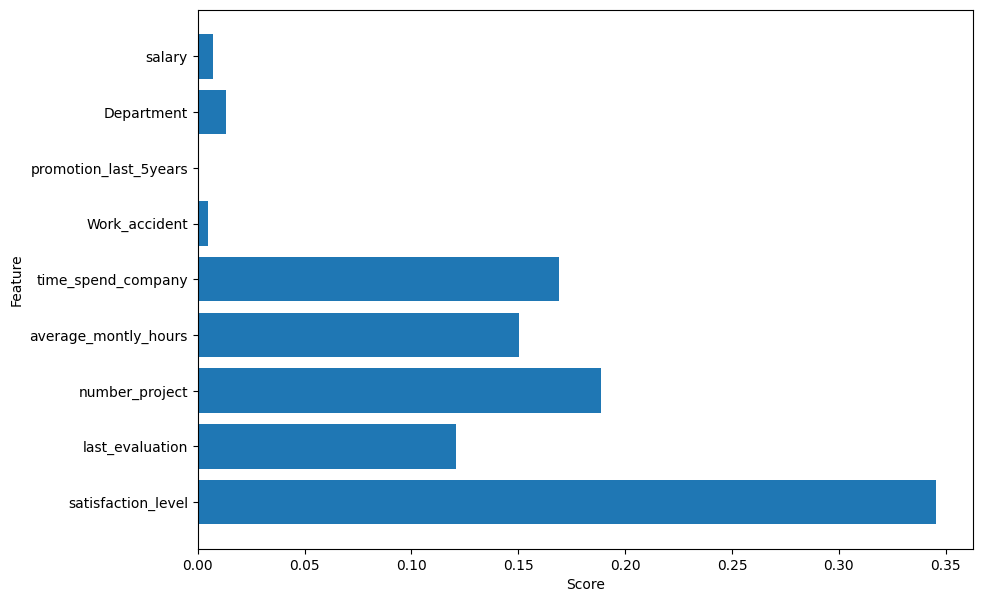

In [43]:
list_features = input.columns
plt.figure(figsize=(10,7))
plt.barh(list_features,score_list)
plt.yticks(list_features)
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

## K_fold CV

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [45]:
score = cross_val_score(rf,x_train_scaled,y_train , cv=KFold(n_splits=5,shuffle=True))
print(score)

[0.98332465 0.98280354 0.98435871 0.98435871 0.98644421]


In [46]:
avg_score = np.mean(score)
avg_score

0.9842579636922038

# Hyper Tuning

In [47]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [48]:
parameters={
    'n_estimators':[50,100],
    'max_features':['sqrt','log2'],
    'max_depth':[10,100]
}

In [49]:
grid_search = GridSearchCV(estimator=rf,param_grid=parameters,cv=5)
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 100],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100]})

In [50]:
grid_search.best_params_

{'max_depth': 100, 'max_features': 'log2', 'n_estimators': 50}

# Build Model with new parameters

In [51]:
random_classifier_new = RandomForestClassifier(max_depth=10,max_features='sqrt',n_estimators=70 )
random_classifier_new.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=10, n_estimators=70)

In [52]:
score = cross_val_score(random_classifier_new,x_train_scaled,y_train , cv=KFold(n_splits=5,shuffle=True),scoring='accuracy')
print(score)

[0.98697238 0.98593017 0.98383733 0.98123045 0.9822732 ]


In [53]:

avg_score = np.mean(score)
avg_score

0.9840487067201863

In [54]:
import pickle


In [55]:
pickle.dump(rf,open("randomClassModel.pkl","wb"))

In [56]:
pickle_file = pickle.load(open("randomClassModel.pkl","rb"))

In [73]:
pickle_file.predict([[0.80,0.86,5,262,6,0,0,7,2]])

array([0])